In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
filepath="/Users/fernandosangerman/Downloads/international_matches.csv"
df=pd.read_csv(filepath,parse_dates = ['date'])

In [3]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [4]:
df.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [5]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [6]:
df.columns.tolist()

['date',
 'home_team',
 'away_team',
 'home_team_continent',
 'away_team_continent',
 'home_team_fifa_rank',
 'away_team_fifa_rank',
 'home_team_total_fifa_points',
 'away_team_total_fifa_points',
 'home_team_score',
 'away_team_score',
 'tournament',
 'city',
 'country',
 'neutral_location',
 'shoot_out',
 'home_team_result',
 'home_team_goalkeeper_score',
 'away_team_goalkeeper_score',
 'home_team_mean_defense_score',
 'home_team_mean_offense_score',
 'home_team_mean_midfield_score',
 'away_team_mean_defense_score',
 'away_team_mean_offense_score',
 'away_team_mean_midfield_score']

In [7]:
df[["home_team_goalkeeper_score","home_team_mean_defense_score","home_team_mean_offense_score","home_team_mean_midfield_score"]].isna().sum()

home_team_goalkeeper_score       15542
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
dtype: int64

In [8]:
countries=df.home_team.unique()
nanlist=[]
for team in countries:
    nanratio=df[df.home_team==team]["home_team_mean_defense_score"].isna().sum()/len(df[df.home_team==team])
    if nanratio==1:
        nanlist.append(team)
        df=df.drop(df[df.home_team==team].index)
        df=df.drop(df[df.away_team==team].index)
print(nanlist)
print(len(nanlist))

['Faroe Islands', 'Eswatini', 'San Marino', 'Zambia', 'Korea DPR', 'Burundi', 'Liechtenstein', 'Malta', 'Tahiti', 'Kenya', 'Tanzania', 'Bangladesh', 'Barbados', 'Thailand', 'Grenada', 'Qatar', 'Oman', 'Malawi', 'Cayman Islands', 'Dominican Republic', 'Kuwait', 'El Salvador', 'Fiji', 'Botswana', 'Solomon Islands', 'Vanuatu', 'Armenia', 'Myanmar', 'Niger', 'Namibia', 'Ethiopia', 'Liberia', 'Sudan', 'Malaysia', 'Bahrain', 'Lesotho', 'Azerbaijan', 'Vietnam', 'Mauritius', 'Hong Kong', 'Nepal', 'Pakistan', 'Lebanon', 'Sri Lanka', 'Syria', 'Guyana', 'St. Lucia', 'St. Kitts and Nevis', 'Cuba', 'St. Vincent and the Grenadines', 'Indonesia', 'Uzbekistan', 'Nicaragua', 'Dominica', 'Guatemala', 'Yemen', 'Philippines', 'Kyrgyz Republic', 'Macau', 'Turkmenistan', 'Aruba', 'Tajikistan', 'Belize', 'Rwanda', 'Kazakhstan', 'Maldives', 'Singapore', 'Seychelles', 'Cambodia', 'Laos', 'Brunei Darussalam', 'Central African Republic', 'Tonga', 'Papua New Guinea', 'Libya', 'Andorra', 'Chad', 'Equatorial Guinea

In [9]:
df.isna().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5951
away_team_goalkeeper_score       6088
home_team_mean_defense_score     5985
home_team_mean_offense_score     5637
home_team_mean_midfield_score    5815
away_team_mean_defense_score     6106
away_team_mean_offense_score     5767
away_team_mean_midfield_score    5925
dtype: int64

70.1820512820513


<AxesSubplot:xlabel='date'>

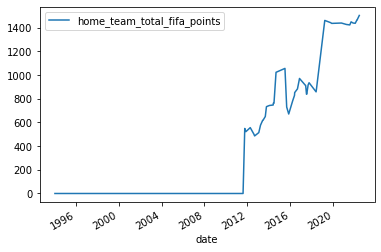

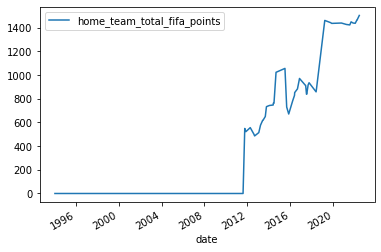

In [10]:
country="Costa Rica"
zerodf=df[df.home_team==country].copy()
ffilldf=df[df.home_team==country].copy()
print(ffilldf.home_team_mean_defense_score.mean())

zerodf["home_team_mean_defense_score"]=zerodf["home_team_mean_defense_score"].fillna(0)
zerodf.plot(x="date",y="home_team_total_fifa_points")

ffilldf.fillna(method="bfill")
ffilldf.plot(x="date",y="home_team_total_fifa_points")


In [64]:
df["home_team_mean_defense_score_rewritten"]=""
odf=df.copy()
odf=odf.reset_index(drop=True)
odf


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_mean_defense_score_rewritten
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12348,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2,
12349,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN,
12350,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2,
12351,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0,


In [12]:
fdf=df.copy()
fdf=fdf[["home_team_fifa_rank","home_team_score","away_team_fifa_rank","away_team_score",
         "home_team_mean_defense_score","home_team_goalkeeper_score","home_team_mean_offense_score",
        "home_team_mean_midfield_score"]]
fdf=fdf.dropna()
xfdf=fdf[["home_team_fifa_rank","away_team_fifa_rank","home_team_score","away_team_score"]]
yds=fdf["home_team_mean_defense_score"]
train_Xf, val_Xf, train_yds, val_yds = train_test_split(xfdf, yds, random_state=1)
fillmodelds=RandomForestRegressor(random_state=1,max_leaf_nodes=10,max_depth=2)
fillmodelds.fit(train_Xf,train_yds)
fillpredictionsds=fillmodelds.predict(val_Xf)
val_maeds = mean_absolute_error(fillpredictionsds, val_yds)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_maeds))

Validation MAE when not specifying max_leaf_nodes: 3


In [73]:
X_to_fill_ds=odf[["home_team_fifa_rank","away_team_fifa_rank","home_team_score","away_team_score"]]
X_to_fill_ds.loc[5]
hhhh=fillmodelds.predict([1,2,3,4])

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [71]:
X_to_fill_ds=odf[["home_team_fifa_rank","away_team_fifa_rank","home_team_score","away_team_score"]]
for ds in range(len(df)):
    if np.isnan(odf.at[ds,"home_team_mean_defense_score"]):
        odf.at[ds,"home_team_mean_defense_score_rewritten"]=fillmodelds.predict(X_to_fill_ds.loc[ds])
    else:
        print(":(")
    
    

ValueError: Expected 2D array, got 1D array instead:
array=[59. 22.  3.  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
np.isnan(8)

False

In [34]:
ygs=fdf["home_team_goalkeeper_score"]
train_Xf, val_Xf, train_ygs, val_ygs = train_test_split(xfdf, ygs, random_state=1)
fillmodelgs=RandomForestRegressor(random_state=1,max_leaf_nodes=10,max_depth=10)
fillmodelgs.fit(train_Xf,train_ygs)
fillpredictionsgs=fillmodelgs.predict(val_Xf)
val_maegs = mean_absolute_error(fillpredictionsgs, val_ygs)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_maegs))

Validation MAE when not specifying max_leaf_nodes: 4


In [16]:
yms=fdf["home_team_mean_midfield_score"]
train_Xf, val_Xf, train_yms, val_yms = train_test_split(xfdf, yms, random_state=1)
fillmodelms=RandomForestRegressor(random_state=1,max_leaf_nodes=10,max_depth=10)
fillmodelms.fit(train_Xf,train_yms)
fillpredictionsms=fillmodelms.predict(val_Xf)
val_maems = mean_absolute_error(fillpredictionsms, val_yms)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_maems))

Validation MAE when not specifying max_leaf_nodes: 3


In [17]:
yos=fdf["home_team_mean_offense_score"]
train_Xf, val_Xf, train_yos, val_yos = train_test_split(xfdf, yos, random_state=1)
fillmodelos=RandomForestRegressor(random_state=1,max_leaf_nodes=10,max_depth=10)
fillmodelos.fit(train_Xf,train_yos)
fillpredictionsos=fillmodelos.predict(val_Xf)
val_maeos = mean_absolute_error(fillpredictionsos, val_yos)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_maeos))

Validation MAE when not specifying max_leaf_nodes: 3


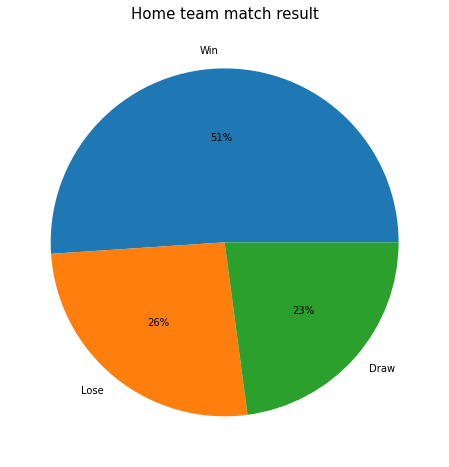

In [156]:
home_team_advantage = df[df['neutral_location']==False]['home_team_result'].value_counts(normalize=True)
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win',  'Lose', 'Draw'],  autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

In [263]:
dfn=df.loc[df.neutral_location==True]



In [276]:
DF=dfn[["home_team_fifa_rank","away_team_fifa_rank",
        "home_team_total_fifa_points","away_team_total_fifa_points",
        "home_team_goalkeeper_score","away_team_goalkeeper_score",
        "home_team_mean_defense_score","away_team_mean_defense_score",
        "home_team_mean_midfield_score","away_team_mean_midfield_score",
        "away_team_mean_offense_score","home_team_mean_offense_score",
        "home_team_result"]].copy()
DF=DF.dropna()
DF.loc[DF.home_team_result=="Win","home_team_result"]=0
DF.loc[DF.home_team_result=="Draw","home_team_result"]=1
DF.loc[DF.home_team_result=="Lose","home_team_result"]=2

In [277]:
X=DF[["home_team_fifa_rank","away_team_fifa_rank",
      "home_team_mean_defense_score","away_team_mean_defense_score",
      "home_team_goalkeeper_score","away_team_goalkeeper_score",
      "home_team_mean_midfield_score","away_team_mean_midfield_score",
      ]]
y=DF["home_team_result"]
y=y.astype('int')
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
rf_model=RandomForestClassifier(max_leaf_nodes=10,random_state=1,max_depth=10)
rf_model.fit(train_X,train_y)
val_predictions = rf_model.predict(val_X)
print("Accuracy:",metrics.accuracy_score(val_y, val_predictions))

Accuracy: 0.5675675675675675
